In [2]:
# from pyspark import SparkContext, SparkConf
import matplotlib.pyplot as plt
from itertools import islice
from datetime import date
import seaborn as sns
from operator import add
import pandas as pd
import numpy as np
import json
from geopy.distance import geodesic as GD
# sc = SparkContext()

# Обзор 2013 года

In [89]:
df13 = pd.read_csv(f"Divvy_Trips_2013.csv")

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_20160\1799140969.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df13 = pd.read_csv(f"Divvy_Trips_2013.csv")


In [90]:
df13['starttime'] = df13.apply(
    lambda x: date(int(x['starttime'].strip('nan').split('-')[0]),
                   int(x['starttime'].strip('nan').split('-')[1]),
                   int(x['starttime'].strip('nan').split('-')[2][:3])),
    axis=1
)

In [91]:
df13['starttime'].unique()

array([datetime.date(2013, 6, 27), datetime.date(2013, 6, 28),
       datetime.date(2013, 6, 29), datetime.date(2013, 6, 30),
       datetime.date(2013, 7, 1), datetime.date(2013, 7, 2),
       datetime.date(2013, 7, 3), datetime.date(2013, 7, 4),
       datetime.date(2013, 7, 5), datetime.date(2013, 7, 6),
       datetime.date(2013, 7, 7), datetime.date(2013, 7, 8),
       datetime.date(2013, 7, 9), datetime.date(2013, 7, 10),
       datetime.date(2013, 7, 11), datetime.date(2013, 7, 12),
       datetime.date(2013, 7, 13), datetime.date(2013, 7, 14),
       datetime.date(2013, 7, 15), datetime.date(2013, 7, 16),
       datetime.date(2013, 7, 17), datetime.date(2013, 7, 18),
       datetime.date(2013, 7, 19), datetime.date(2013, 7, 20),
       datetime.date(2013, 7, 21), datetime.date(2013, 7, 22),
       datetime.date(2013, 7, 23), datetime.date(2013, 7, 24),
       datetime.date(2013, 7, 25), datetime.date(2013, 7, 26),
       datetime.date(2013, 7, 27), datetime.date(2013, 7, 28),
 

In [86]:
df13 = df13[df13['starttime'] < date(2013, 4, 1)]

In [87]:
df13 = df13.groupby(['starttime'])['tripduration'].sum()
df13 = df13.to_frame()
df13.reset_index(inplace=True)

In [88]:
df13.head()

,starttime,tripduration


### не рассматриваем, так как данные есть только с 6-го месяца 2013 года

# Обзор 2014 года

In [35]:
df = pd.read_csv(f"Divvy_Trips_2014_full.csv.gz", compression="gzip")

In [36]:
df = df[(df['birthyear'] > 1930) & (df['birthyear'] < 2018)]

In [37]:
df['starttime'] = df.apply(
    lambda x: date(int(x['starttime'].split('/')[2][:4]),
                   int(x['starttime'].split('/')[0]),
                   int(x['starttime'].split('/')[1])
                  ),
    axis=1
)

In [38]:
df = df[df['starttime'] < date(2014, 4, 1)]

In [6]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
783230,1319969,2014-03-31,3/31/2014 23:57,2333,140,240,Sheridan Rd & Irving Park Rd,254,Pine Grove Ave & Irving Park Rd,Subscriber,Male,1984.0
783231,1319967,2014-03-31,3/31/2014 23:57,1607,189,240,Sheridan Rd & Irving Park Rd,254,Pine Grove Ave & Irving Park Rd,Subscriber,Male,1985.0
783232,1319963,2014-03-31,4/1/2014 0:11,1882,1131,261,Hermitage Ave & Polk St,305,Western Ave & Division St,Subscriber,Female,1970.0
783234,1319957,2014-03-31,4/1/2014 0:00,2548,665,174,Canal St & Madison St,99,Lake Shore Dr & Ohio St,Subscriber,Male,1981.0
783239,1319951,2014-03-31,3/31/2014 23:49,2276,322,306,Sheridan Rd & Buena Ave,114,Sheffield Ave & Addison St,Subscriber,Male,1987.0


In [39]:
df = df.groupby(['starttime'])['tripduration'].sum()

In [40]:
df = df.to_frame()

In [41]:
df.reset_index(inplace=True)

In [42]:
df.head(100)

,starttime,tripduration
0,2014-01-01,69747
1,2014-01-02,77666
2,2014-01-03,3503
3,2014-01-04,201359
4,2014-01-05,23588
...,...,...
83,2014-03-27,1122194
84,2014-03-28,1406078
85,2014-03-29,1022788
86,2014-03-30,1667703


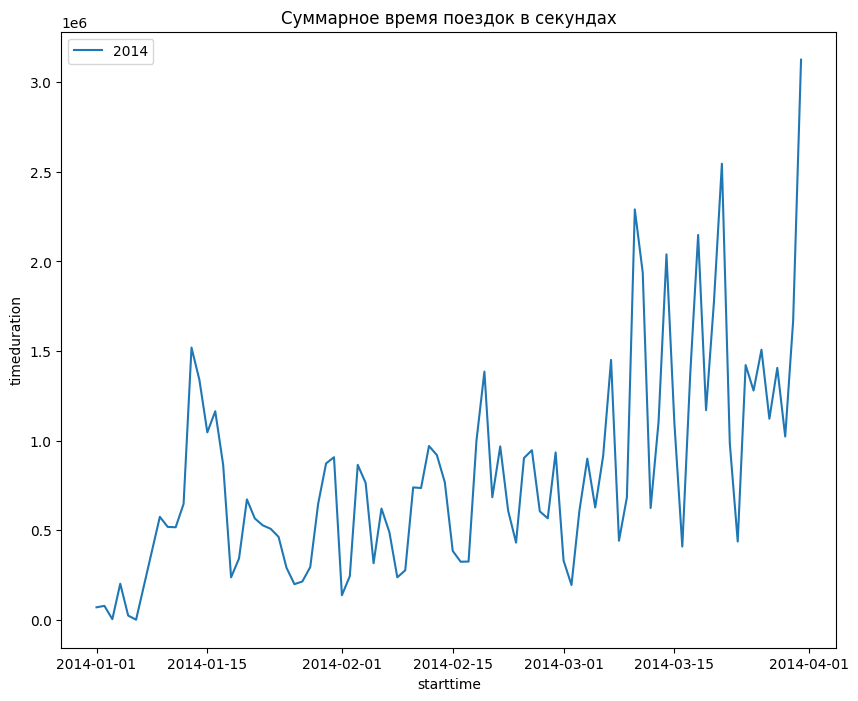

In [43]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df.plot(x='starttime', y='tripduration', kind='line', ax=ax, label='2014')
ax.set_xlabel('starttime') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2015 года

In [12]:
df15 = pd.read_csv(f"Divvy_Trips_2015_full.csv.gz", compression="gzip")

In [13]:
df15 = df15[(df15['birthyear'] > 1930) & (df15['birthyear'] < 2018)]

In [14]:
df15['starttime'] = df15.apply(
    lambda x: date(int(x['starttime'].split('/')[2][:4]),
                   int(x['starttime'].split('/')[0]),
                   int(x['starttime'].split('/')[1])
                  ),
    axis=1
)

In [15]:
df15 = df15[df15['starttime'] < date(2015, 4, 1)]

In [16]:
df15 = df15.groupby(['starttime'])['tripduration'].sum()
df15 = df15.to_frame()
df15.reset_index(inplace=True)

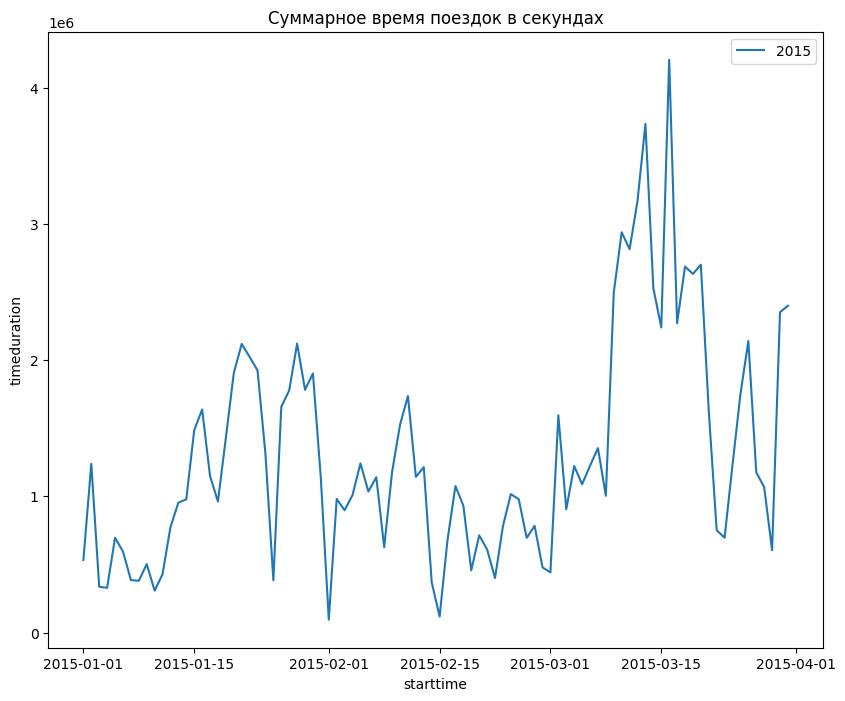

In [27]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df15.plot(x='starttime', y='tripduration', kind='line', ax=ax, label='2015')
ax.set_xlabel('starttime') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

In [18]:
df15['tripduration'].mean()

1312231.3333333333

# Обзор 2016 года

In [22]:
df16 = pd.read_csv(f"Divvy_Trips_2016_full.csv.gz", compression="gzip")
df16 = df16[(df16['birthyear'] > 1930) & (df16['birthyear'] < 2018)]
df16['starttime'] = df16.apply(
    lambda x: date(int(x['starttime'].split('/')[2][:4]),
                   int(x['starttime'].split('/')[0]),
                   int(x['starttime'].split('/')[1])
                  ),
    axis=1
)
df16 = df16[df16['starttime'] < date(2016, 4, 1)]
df16 = df16.groupby(['starttime'])['tripduration'].sum()
df16 = df16.to_frame()
df16.reset_index(inplace=True)

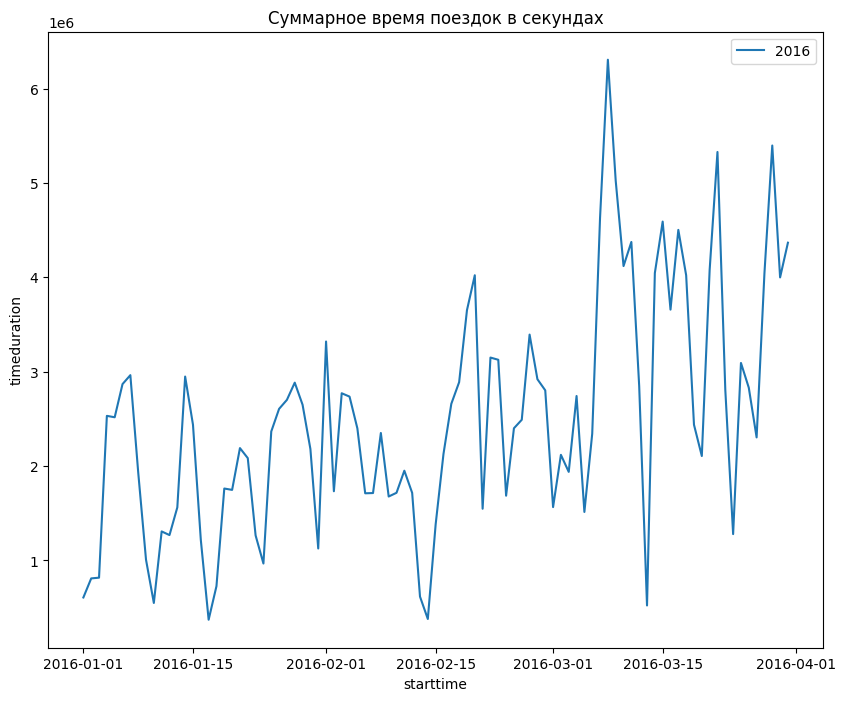

In [25]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df16.plot(x='starttime', y='tripduration', kind='line', ax=ax, label='2016')
ax.set_xlabel('starttime') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2017 года

In [30]:
df17 = pd.read_csv(f"Divvy_Trips_2017_full.csv.gz", compression="gzip")

In [32]:
df17 = df17[(df17['birthyear'] > 1930) & (df17['birthyear'] < 2018)]
df17['start_time'] = df17.apply(
    lambda x: date(int(x['start_time'].split('/')[2][:4]),
                   int(x['start_time'].split('/')[0]),
                   int(x['start_time'].split('/')[1])
                  ),
    axis=1
)
df17 = df17[df17['start_time'] < date(2017, 4, 1)]
df17 = df17.groupby(['start_time'])['tripduration'].sum()
df17 = df17.to_frame()
df17.reset_index(inplace=True)

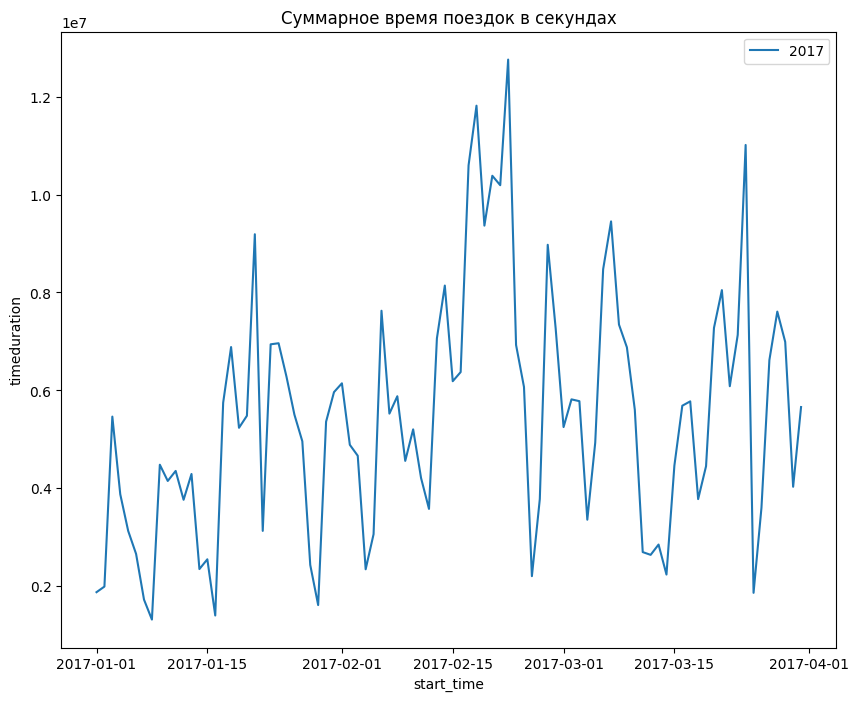

In [34]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df17.plot(x='start_time', y='tripduration', kind='line', ax=ax, label='2017')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2018 года
### для начала потребуется обработать датасет

In [4]:
df18 = pd.read_csv(f"Divvy_Trips_2018_full.csv.gz", compression="gzip")

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_20160\3752065643.py:1: DtypeWarning: Columns (1,2,4,6,8,9,10,13,14,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df18 = pd.read_csv(f"Divvy_Trips_2018_full.csv.gz", compression="gzip")


In [8]:
df18 = df18[['01 - Rental Details Local Start Time', '01 - Rental Details Duration In Seconds Uncapped', 'start_time', 'tripduration']]

In [11]:
df18['starttime'] = df18['start_time'].astype(str) + df18['01 - Rental Details Local Start Time'].astype(str)

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_20160\4234054669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['starttime'] = df18['start_time'].astype(str) + df18['01 - Rental Details Local Start Time'].astype(str)


In [16]:
df18['starttime'] = df18.apply(
    lambda x: date(int(x['starttime'].strip('nan').split('/')[2][:4]),
                   int(x['starttime'].strip('nan').split('/')[0]),
                   int(x['starttime'].strip('nan').split('/')[1])
                  ) if '/' in x['starttime'].strip('nan')
    else date(int(x['starttime'].strip('nan').split('-')[0]),
                   int(x['starttime'].strip('nan').split('-')[1]),
                   int(x['starttime'].strip('nan').split('-')[2][:3])),
    axis=1
)

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_20160\1612216439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['starttime'] = df18.apply(


In [18]:
df18 = df18.drop(['01 - Rental Details Local Start Time', 'start_time'], axis=1)

In [20]:
df18['trip_duration'] = df18['tripduration'].astype(str) + df18['01 - Rental Details Duration In Seconds Uncapped'].astype(str)

In [22]:
df18['trip_duration'] = df18.apply(
    lambda x: float(x['trip_duration'].strip('nan').replace(',', '')),
    axis=1
)

In [26]:
df18 = df18.drop(['01 - Rental Details Duration In Seconds Uncapped', 'tripduration'], axis=1)

In [28]:
df18.columns = ['start_time', 'tripduration']

In [38]:
df18 = df18[(df18['start_time'] < date(2018, 4, 1)) & (df18['start_time'] > date(2017, 12, 31))]

In [43]:
df18.head()

,start_time,tripduration
0,2018-01-01,713435.0
1,2018-01-02,983362.0
2,2018-01-03,1497212.0
3,2018-01-04,1337957.0
4,2018-01-05,1187154.0


In [42]:
df18 = df18.groupby(['start_time'])['tripduration'].sum()
df18 = df18.to_frame()
df18.reset_index(inplace=True)

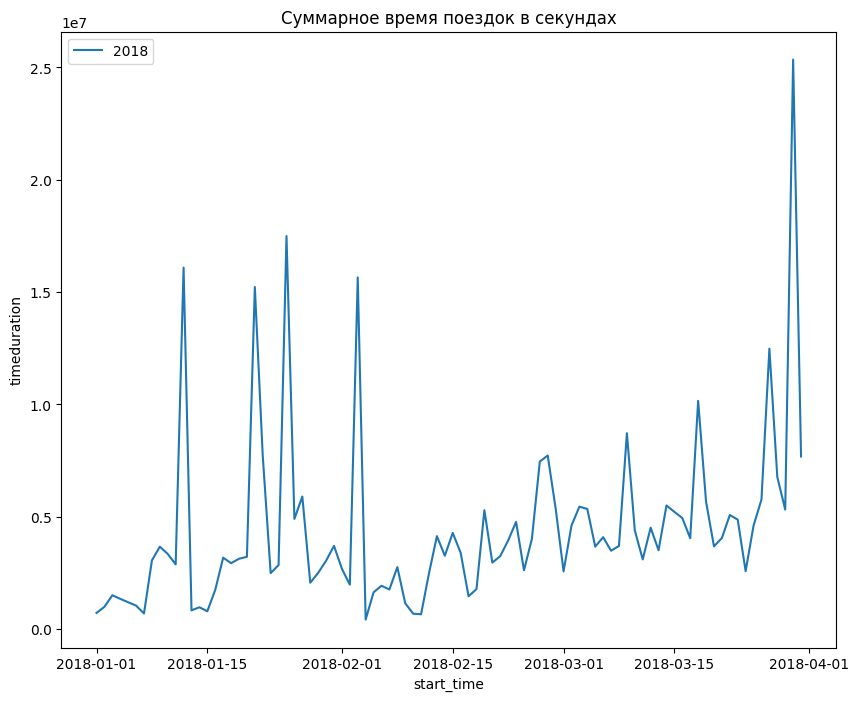

In [44]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df18.plot(x='start_time', y='tripduration', kind='line', ax=ax, label='2018')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2019 года

In [52]:
df19 = pd.read_csv(f"Divvy_Trips_2019_full.csv.gz", compression="gzip")

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_20160\1019827260.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df19 = pd.read_csv(f"Divvy_Trips_2019_full.csv.gz", compression="gzip")


In [47]:
df19.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [53]:
df19 = df19[(df19['birthyear'] > 1930) & (df19['birthyear'] < 2018)]
df19['start_time'] = df19.apply(
    lambda x: date(int(x['start_time'].split('/')[2][:4]),
                   int(x['start_time'].split('/')[0]),
                   int(x['start_time'].split('/')[1])
                  ) if '/' in x['start_time']
    else date(int(x['start_time'].split('-')[0]),
                   int(x['start_time'].split('-')[1]),
                   int(x['start_time'].split('-')[2][:3])),
    axis=1
)
df19 = df19[(df19['start_time'] < date(2019, 4, 1)) & (df19['start_time'] > date(2018, 12, 31))]

ValueError: could not convert string to float: '1,783.0'

In [55]:
df19['tripduration'] = df19.apply(
    lambda x: float(x['tripduration'].replace(',', '')),
    axis=1
)

In [56]:
df19 = df19.groupby(['start_time'])['tripduration'].sum()
df19 = df19.to_frame()
df19.reset_index(inplace=True)

In [57]:
df19.head()

,start_time,tripduration
0,2019-01-01,1005182.0
1,2019-01-02,2628622.0
2,2019-01-03,3735719.0
3,2019-01-04,5994142.0
4,2019-01-05,7025746.0


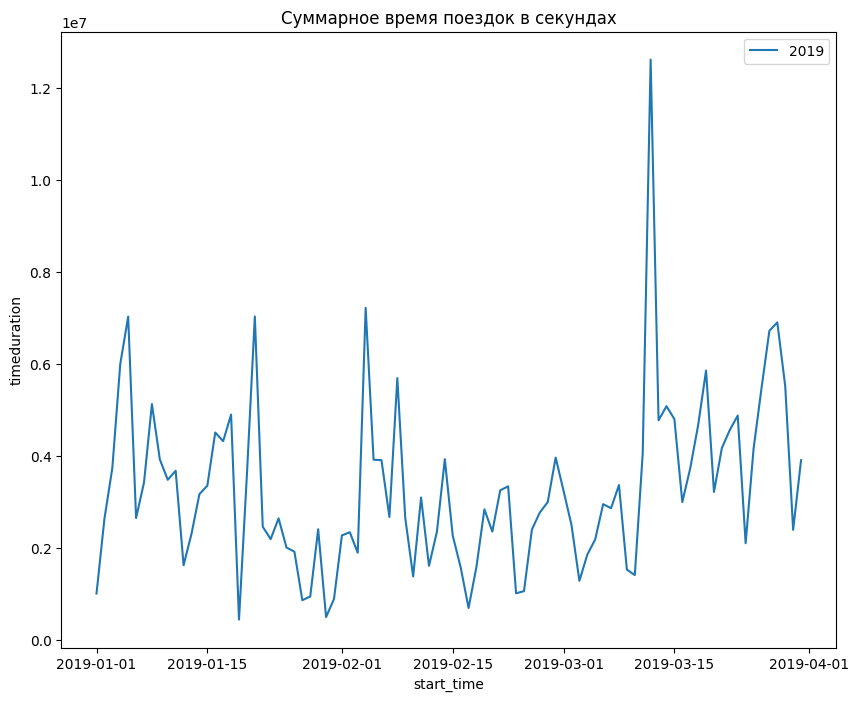

In [58]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df19.plot(x='start_time', y='tripduration', kind='line', ax=ax, label='2019')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2020 года

In [94]:
df20 = pd.read_csv(f"Divvy_Trips_2020_full.csv.gz", compression="gzip")

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_20160\3413219149.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv(f"Divvy_Trips_2020_full.csv.gz", compression="gzip")


In [117]:
df20.head(100)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration
0,EACB19130B0CDA4A,docked_bike,2020-01-21,2020-01-21 20:14:30,Western Ave & Leland Ave,239.0,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,451.0
1,8FED874C809DC021,docked_bike,2020-01-30,2020-01-30 14:26:22,Clark St & Montrose Ave,234.0,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,223.0
2,789F3C21E472CA96,docked_bike,2020-01-09,2020-01-09 19:32:17,Broadway & Belmont Ave,296.0,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,171.0
3,C9A388DAC6ABF313,docked_bike,2020-01-06,2020-01-06 16:25:56,Clark St & Randolph St,51.0,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,529.0
4,943BC3CBECCFD662,docked_bike,2020-01-30,2020-01-30 08:42:48,Clinton St & Lake St,66.0,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8AE216607599859B,docked_bike,2020-01-07,2020-01-07 08:54:47,Kosciuszko Park,499.0,Kedzie Ave & Milwaukee Ave,260.0,41.9306,-87.7238,41.9296,-87.7079,member,351.0
96,2B2663BB6275FCBC,docked_bike,2020-01-05,2020-01-05 17:23:41,Lincoln Ave & Belmont Ave,131.0,Sheffield Ave & Wrightwood Ave,302.0,41.9394,-87.6684,41.9287,-87.6538,member,426.0
97,F497A30987B4A7E4,docked_bike,2020-01-28,2020-01-28 08:47:58,Wilton Ave & Diversey Pkwy,13.0,Kingsbury St & Kinzie St,133.0,41.9324,-87.6527,41.8892,-87.6385,member,2222.0
98,833F48F0CA8FA238,docked_bike,2020-01-02,2020-01-02 13:43:07,Larrabee St & Division St,359.0,Clark St & Grace St,165.0,41.9035,-87.6434,41.9508,-87.6592,member,1691.0


In [97]:
df20["tripduration"] = pd.to_datetime(df20["ended_at"]) - pd.to_datetime(df20["started_at"])

In [103]:
df20['tripduration'] = df20["tripduration"].dt.total_seconds()

In [116]:
df20['started_at'] = df20.apply(
    lambda x: date(int(x['started_at'].split('-')[0]),
                   int(x['started_at'].split('-')[1]),
                   int(x['started_at'].split('-')[2][:3])),
    axis=1
)

In [118]:
df20 = df20.groupby(['started_at'])['tripduration'].sum()
df20 = df20.to_frame()
df20.reset_index(inplace=True)

In [122]:
df20 = df20[(df20['started_at'] < date(2020, 4, 1)) & (df20['started_at'] > date(2019, 12, 31))]

In [123]:
df20 = df20[df20['tripduration'] > 60]

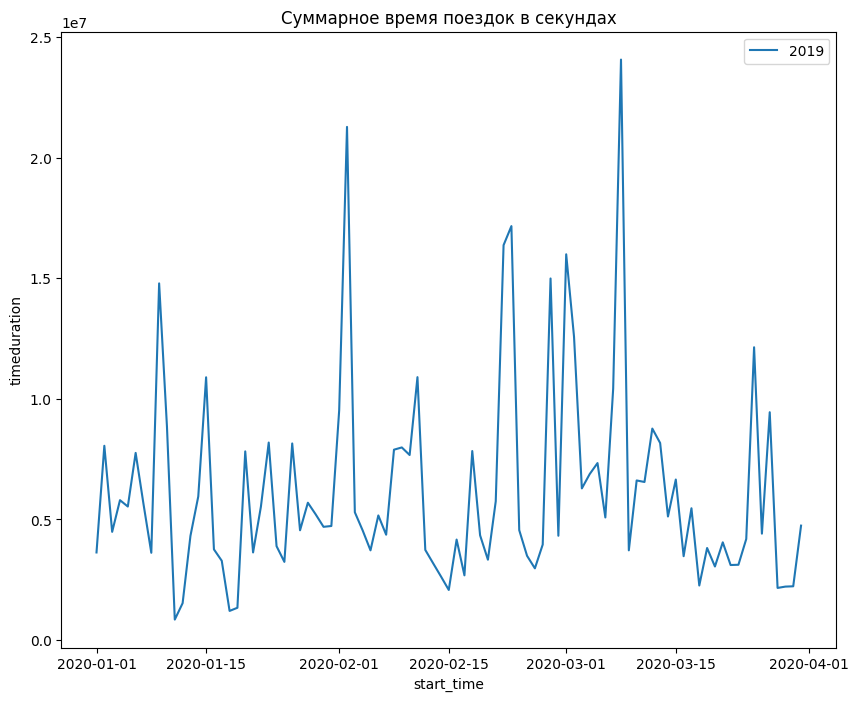

In [124]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df20.plot(x='started_at', y='tripduration', kind='line', ax=ax, label='2020')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2021 года

In [133]:
df21 = pd.read_csv(f"Divvy_Trips_2021_full.csv.gz", compression="gzip")

In [135]:
df21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [136]:
df21["tripduration"] = pd.to_datetime(df21["ended_at"]) - pd.to_datetime(df21["started_at"])

In [137]:
df21['tripduration'] = df21["tripduration"].dt.total_seconds()

In [138]:
df21['started_at'] = df21.apply(
    lambda x: date(int(x['started_at'].split('-')[0]),
                   int(x['started_at'].split('-')[1]),
                   int(x['started_at'].split('-')[2][:3])),
    axis=1
)

In [139]:
df21 = df21[df21['tripduration'] > 60]

In [140]:
df21 = df21[(df21['started_at'] < date(2021, 4, 1)) & (df21['started_at'] > date(2020, 12, 31))]

In [141]:
df21 = df21.groupby(['started_at'])['tripduration'].sum()
df21 = df21.to_frame()
df21.reset_index(inplace=True)

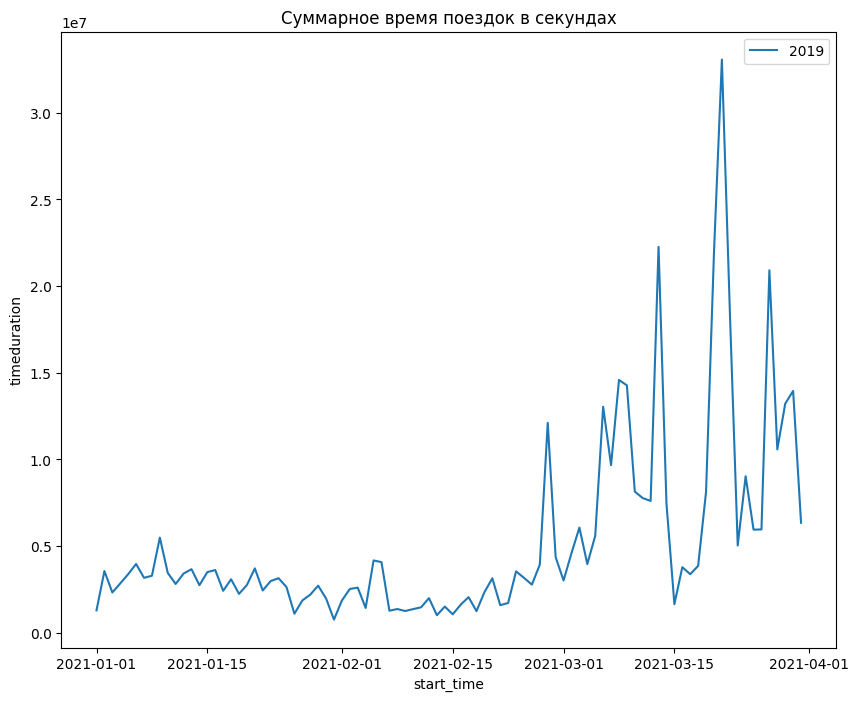

In [142]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df21.plot(x='started_at', y='tripduration', kind='line', ax=ax, label='2021')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2022 года

In [3]:
df22 = pd.read_csv(f"Divvy_Trips_2022_full.csv.gz", compression="gzip")

In [4]:
df22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
df22["tripduration"] = pd.to_datetime(df22["ended_at"]) - pd.to_datetime(df22["started_at"])

In [6]:
df22['tripduration'] = df22["tripduration"].dt.total_seconds()

In [7]:
df22['started_at'] = df22.apply(
    lambda x: date(int(x['started_at'].split('-')[0]),
                   int(x['started_at'].split('-')[1]),
                   int(x['started_at'].split('-')[2][:3])),
    axis=1
)

In [8]:
df22 = df22[df22['tripduration'] > 60]
df22 = df22[(df22['started_at'] < date(2022, 4, 1)) & (df22['started_at'] > date(2021, 12, 31))]

In [9]:
df22 = df22.groupby(['started_at'])['tripduration'].sum()
df22 = df22.to_frame()
df22.reset_index(inplace=True)

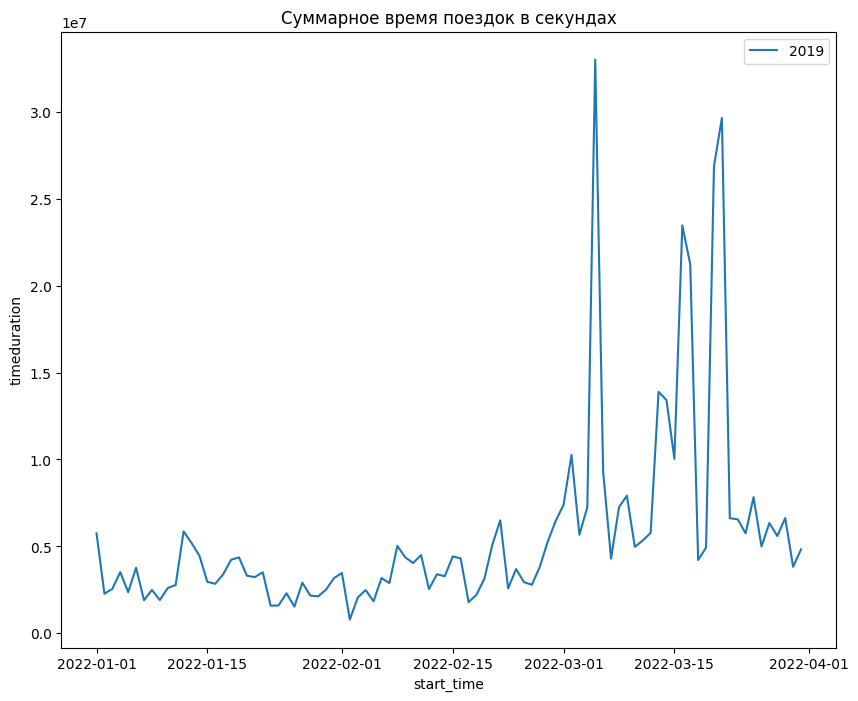

In [10]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df22.plot(x='started_at', y='tripduration', kind='line', ax=ax, label='2022')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()

# Обзор 2023 года

In [12]:
df23 = pd.read_csv(f"Divvy_Trips_2023_full.csv.gz", compression="gzip")

In [14]:
df23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [15]:
df23["tripduration"] = pd.to_datetime(df23["ended_at"]) - pd.to_datetime(df23["started_at"])

In [16]:
df23['tripduration'] = df23["tripduration"].dt.total_seconds()

In [17]:
df23['started_at'] = df23.apply(
    lambda x: date(int(x['started_at'].split('-')[0]),
                   int(x['started_at'].split('-')[1]),
                   int(x['started_at'].split('-')[2][:3])),
    axis=1
)

In [18]:
df23 = df23[df23['tripduration'] > 60]
df23 = df23[(df23['started_at'] < date(2023, 4, 1)) & (df23['started_at'] > date(2022, 12, 31))]

In [19]:
df23 = df23.groupby(['started_at'])['tripduration'].sum()
df23 = df23.to_frame()
df23.reset_index(inplace=True)

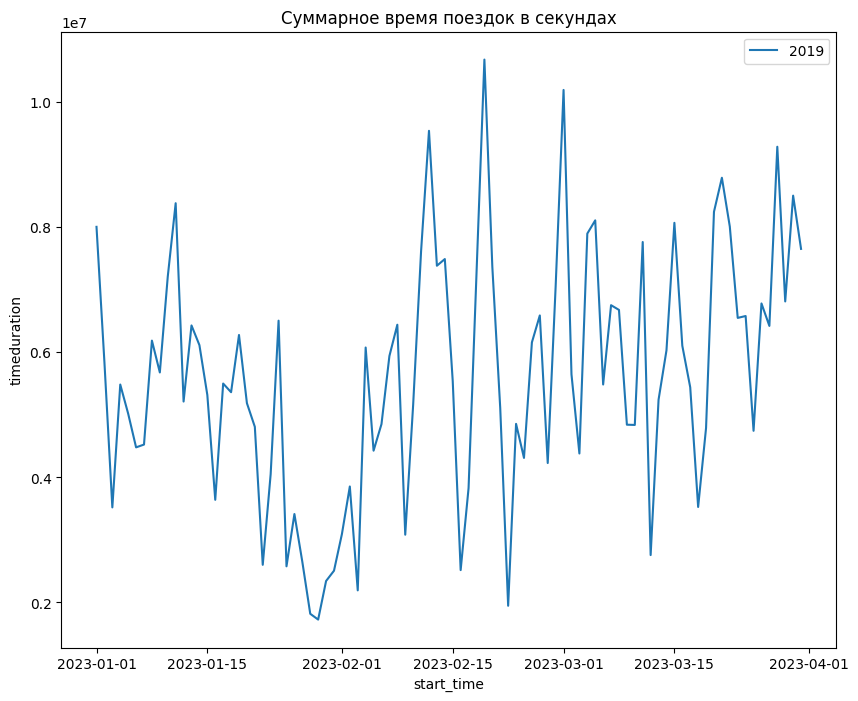

In [20]:
fig, ax = plt.subplots(figsize=(10, 8)) # устанавливаем размер графика
df23.plot(x='started_at', y='tripduration', kind='line', ax=ax, label='2023')
ax.set_xlabel('start_time') # устанавливаем имя оси x
ax.set_ylabel('timeduration') # устанавливаем имя оси y
ax.set_title('Суммарное время поездок в секундах') # устанавливаем заголовок графика
plt.show()